<a href="https://colab.research.google.com/github/lugastyan/ML-portofolio/blob/main/Predict_Employees_May_Quit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset (Main HR Database Record)




In [ ]:
# Library used
import pandas as pd

In [ ]:
hr_df = pd.read_csv('/content/hr_data.csv')
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
# View which columns are categorical
hr_df.select_dtypes(exclude=['int','float']).columns

Index(['department', 'salary'], dtype='object')

In [ ]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [ ]:
# How many row in our dataset
len(hr_df)

14999

In [ ]:
# How many columns
len(hr_df.columns)

9

In [ ]:
hr_df.shape

(14999, 9)

# Loading Dataset (Evaluation and Employee Statisfaction)

In [ ]:
emp_statis_eval = pd.read_excel('/content/employee_satisfaction_evaluation.xlsx')
emp_statis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [ ]:
emp_statis_eval.shape

(14999, 3)

# Marge or Join Tables

In [ ]:
main_df = hr_df.set_index('employee_id').join(emp_statis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


# Are there missing values?

In [ ]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [ ]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


# Fill Missing Data

In [ ]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

<ipython-input-15-23c26ff85e3f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  main_df.fillna(main_df.mean(), inplace=True)


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
main_df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [ ]:
# Removing employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head(2)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86


In [ ]:
main_df_final.groupby('department').sum()

<ipython-input-18-444b1b88810d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  main_df_final.groupby('department').sum()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [ ]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

# Display your Correlation Matrix

<ipython-input-20-b3c2a200776c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


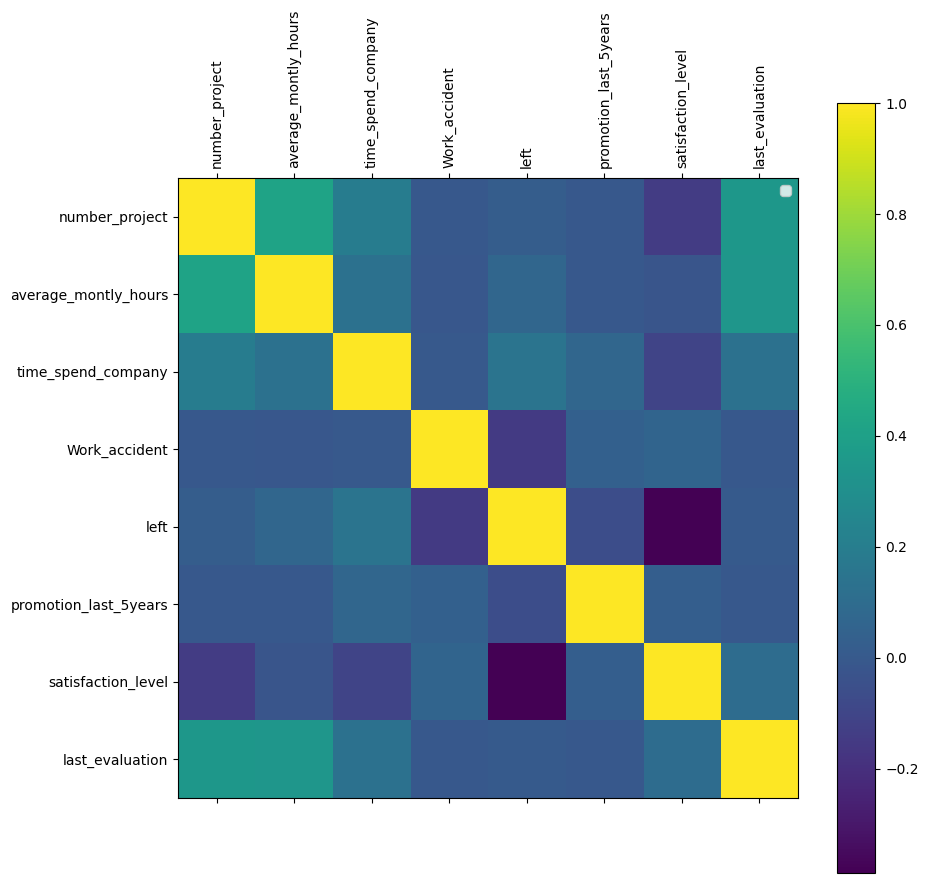

In [ ]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
  corr = df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
  plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(main_df_final)

# Preparing out Dataset for ML

In [ ]:
# Perform One Hot Encoding on Categorical Data

categorical = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorical, drop_first = True)
main_df_final.head(2)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
# How many columnsdo we now have?

len(main_df_final.columns)


19

In [ ]:
# How many employeees in the dataset have left?
len(main_df_final.loc[main_df_final['left']==1])

3571

In [ ]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'], axis=1).values

# we assigned those label values to out Y dataset
y = main_df_final['left'].values

In [ ]:
# Split it to 70:30 ratio train:test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]

array([-1.46402726, -0.93754154, -0.34091512, -0.41286448,  7.01672643,
       -0.81622204, -0.90235064, -0.23915402, -0.23148986, -0.22965715,
       -0.20740322, -0.24771499, -0.25308475, -0.61173087,  2.36446809,
       -0.47081448, -0.97451271,  1.15034848])

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.464027,-0.937542,-0.340915,-0.412864,7.016726,-0.816222,-0.902351,-0.239154,-0.231490,-0.229657,-0.207403,-0.247715,-0.253085,-0.611731,2.364468,-0.470814,-0.974513,1.150348
1,0.972563,0.944720,-0.340915,-0.412864,-0.142517,-0.213276,0.444479,-0.239154,-0.231490,-0.229657,-0.207403,-0.247715,-0.253085,1.634706,-0.422928,-0.470814,-0.974513,1.150348
2,0.160366,-0.517036,-0.340915,-0.412864,-0.142517,1.153403,0.561595,-0.239154,-0.231490,-0.229657,4.821526,-0.247715,-0.253085,-0.611731,-0.422928,-0.470814,-0.974513,1.150348
3,0.160366,-0.416916,0.346216,-0.412864,-0.142517,0.068099,-1.370813,-0.239154,-0.231490,-0.229657,4.821526,-0.247715,-0.253085,-0.611731,-0.422928,-0.470814,-0.974513,-0.869302
4,0.972563,0.323974,1.720479,-0.412864,-0.142517,-1.378972,-1.429371,-0.239154,4.319844,-0.229657,-0.207403,-0.247715,-0.253085,-0.611731,-0.422928,-0.470814,-0.974513,1.150348


In [ ]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-6.124785e-17,-1.052380e-16,1.130209e-16,-3.045473e-18,5.278820e-17,2.797301e-14,1.531975e-14,-7.909771e-17,7.681360e-17,4.060631e-18,3.383859e-17,-1.759607e-17,3.654568e-17,5.549529e-17,-4.568210e-17,4.805080e-17,-7.106104e-18,-8.121262e-18
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.464027e+00,-2.098937e+00,-1.028047e+00,-4.128645e-01,-1.425166e-01,-2.102508e+00,-2.073507e+00,-2.391540e-01,-2.314899e-01,-2.296571e-01,-2.074032e-01,-2.477150e-01,-2.530847e-01,-6.117309e-01,-4.229281e-01,-4.708145e-01,-9.745127e-01,-8.693018e-01
25%,-6.518306e-01,-8.974934e-01,-3.409151e-01,-4.128645e-01,-1.425166e-01,-6.956327e-01,-9.023506e-01,-2.391540e-01,-2.314899e-01,-2.296571e-01,-2.074032e-01,-2.477150e-01,-2.530847e-01,-6.117309e-01,-4.229281e-01,-4.708145e-01,-9.745127e-01,-8.693018e-01
50%,1.603661e-01,-1.643465e-02,-3.409151e-01,-4.128645e-01,-1.425166e-01,1.082959e-01,3.457458e-02,-2.391540e-01,-2.314899e-01,-2.296571e-01,-2.074032e-01,-2.477150e-01,-2.530847e-01,-6.117309e-01,-4.229281e-01,-4.708145e-01,-9.745127e-01,-8.693018e-01
75%,9.725628e-01,8.846482e-01,3.462163e-01,-4.128645e-01,-1.425166e-01,8.318317e-01,9.129420e-01,-2.391540e-01,-2.314899e-01,-2.296571e-01,-2.074032e-01,-2.477150e-01,-2.530847e-01,1.634706e+00,-4.229281e-01,-4.708145e-01,1.026154e+00,1.150348e+00
max,2.596956e+00,2.186212e+00,4.469005e+00,2.422102e+00,7.016726e+00,1.555367e+00,1.674194e+00,4.181406e+00,4.319844e+00,4.354317e+00,4.821526e+00,4.036897e+00,3.951246e+00,1.634706e+00,2.364468e+00,2.123979e+00,1.026154e+00,1.150348e+00


# Train Model with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f'Accuracy {100*accuracy_score(predictions, y_test):.2f} %')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 77.96 %
[[3149  272]
 [ 720  359]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3421
           1       0.57      0.33      0.42      1079

    accuracy                           0.78      4500
   macro avg       0.69      0.63      0.64      4500
weighted avg       0.76      0.78      0.76      4500



# Test Model with New Data

In [ ]:
# Enter Value Here
input_data = {
    'number_project':[3],
    'average_montly_hours': [160],
    'time_spend_company': [5],
    'work_accident':[0],
    'promotion_last_5years': [1],
    'last_evaluation': [0.5],
    'satisfaction_level': [0.5],
    'department_RandD': [0],
    'department_accounting': [0],
    'department_hr': [0],
    'department_management': [0],
    'department_marketing': [1],
    'department_product_mng': [0],
    'department_sales': [0],
    'department_support': [0],
    'department_technical': [0],
    'salary_low': [0],
    'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape datafor input into our model prediction function
input_data = input_data.reshape(1, -1)

# Run prediction for our test sample
# 0 = employee will not leave
# 1 = employee will leave
model.predict(input_data)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([0])

In [ ]:
# Probabilities ofbelonging toeither class
model.predict_proba(input_data)

array([[0.8951555, 0.1048445]])